In [1]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [11]:
#probamos con un dataset de prueba
balao = pd.read_csv('/home/davas/Documents/EPIC_4/ghi_proyect/data/Balao.csv')

In [12]:
balao.head()

,air_temp,clearsky_dhi,clearsky_ghi,cloud_opacity,dni,ghi,relative_humidity,period_end,period
0,25,0,0,86.6,0,0,82.4,2021-01-01T01:00:00Z,PT60M
1,25,0,0,65.0,0,0,82.9,2021-01-01T02:00:00Z,PT60M
2,24,0,0,65.1,0,0,83.1,2021-01-01T03:00:00Z,PT60M
3,24,0,0,52.7,0,0,82.8,2021-01-01T04:00:00Z,PT60M
4,24,0,0,54.7,0,0,83.1,2021-01-01T05:00:00Z,PT60M


In [13]:

balao = balao.drop('period', axis=1)
balao.head()

,air_temp,clearsky_dhi,clearsky_ghi,cloud_opacity,dni,ghi,relative_humidity,period_end
0,25,0,0,86.6,0,0,82.4,2021-01-01T01:00:00Z
1,25,0,0,65.0,0,0,82.9,2021-01-01T02:00:00Z
2,24,0,0,65.1,0,0,83.1,2021-01-01T03:00:00Z
3,24,0,0,52.7,0,0,82.8,2021-01-01T04:00:00Z
4,24,0,0,54.7,0,0,83.1,2021-01-01T05:00:00Z


In [14]:
balao['period_end'] = pd.to_datetime(balao['period_end'])
balao['year'] = balao['period_end'].dt.year
balao['month'] = balao['period_end'].dt.month
balao['day'] = balao['period_end'].dt.day
balao['hour'] = balao['period_end'].dt.hour
balao.head()

,air_temp,clearsky_dhi,clearsky_ghi,cloud_opacity,dni,ghi,relative_humidity,period_end,year,month,day,hour
0,25,0,0,86.6,0,0,82.4,2021-01-01 01:00:00+00:00,2021,1,1,1
1,25,0,0,65.0,0,0,82.9,2021-01-01 02:00:00+00:00,2021,1,1,2
2,24,0,0,65.1,0,0,83.1,2021-01-01 03:00:00+00:00,2021,1,1,3
3,24,0,0,52.7,0,0,82.8,2021-01-01 04:00:00+00:00,2021,1,1,4
4,24,0,0,54.7,0,0,83.1,2021-01-01 05:00:00+00:00,2021,1,1,5


Analisis Exploratorio de los datos

In [15]:
balao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31080 entries, 0 to 31079
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   air_temp           31080 non-null  int64              
 1   clearsky_dhi       31080 non-null  int64              
 2   clearsky_ghi       31080 non-null  int64              
 3   cloud_opacity      31080 non-null  float64            
 4   dni                31080 non-null  int64              
 5   ghi                31080 non-null  int64              
 6   relative_humidity  31080 non-null  float64            
 7   period_end         31080 non-null  datetime64[ns, UTC]
 8   year               31080 non-null  int32              
 9   month              31080 non-null  int32              
 10  day                31080 non-null  int32              
 11  hour               31080 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(2), int32(4

In [16]:
balao.describe()

,air_temp,clearsky_dhi,clearsky_ghi,cloud_opacity,dni,ghi,relative_humidity,year,month,day,hour
count,31080.000000,31080.000000,31080.000000,31080.000000,31080.000000,31080.000000,31080.000000,31080.000000,31080.000000,31080.000000,31080.000000
mean,25.797394,56.579633,284.360746,50.128810,101.312194,192.260972,84.056641,2022.308977,6.107529,15.628378,11.500000
std,1.565079,64.273248,359.308166,26.132621,196.479616,260.549180,6.882123,1.042177,3.402419,8.782194,6.922298
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.600000,2021.000000,1.000000,1.000000,0.000000
25%,25.000000,0.000000,0.000000,32.100000,0.000000,0.000000,79.500000,2021.000000,3.000000,8.000000,5.750000
50%,26.000000,10.000000,14.000000,50.100000,0.000000,8.000000,84.800000,2022.000000,6.000000,16.000000,11.500000
75%,27.000000,117.000000,630.000000,70.300000,92.000000,377.000000,89.500000,2023.000000,9.000000,23.000000,17.250000
max,31.000000,343.000000,1024.000000,97.000000,924.000000,1020.000000,99.700000,2024.000000,12.000000,31.000000,23.000000


In [17]:
!pip install ydata_profiling
from ydata_profiling import ProfileReport

  Using cached ydata_profiling-4.9.0-py2.py3-none-any.whl.metadata (20 kB)
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached phik-0.12.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached multimethod-1.12-py3-none-any.whl.metadata (9.6 kB)
  Using cached typeguard-4.3.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached wordcloud-1.9.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
Using cached ydata_profiling-4.9.0-py2.py3-none-any.whl (356 kB)
Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
Using cached multimethod-1.12-py3-none-any.whl (10 kB)
Using cached phik-0.12.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (687 kB)
Using cached ty

In [18]:
# Generamos el reporte de perfilado de datos
perfil_datos = ProfileReport(balao, title='Reporte de Perfilado de datos GHI_Balao', explorative=True)

In [20]:
perfil_datos.to_file('perfil_datos_balao.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/davas/anaconda3/lib/python3.12/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 9 9 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/home/davas/anaconda3/lib/python3.12/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 5 5 5]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/home/davas/anaconda3/lib/python3.12/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

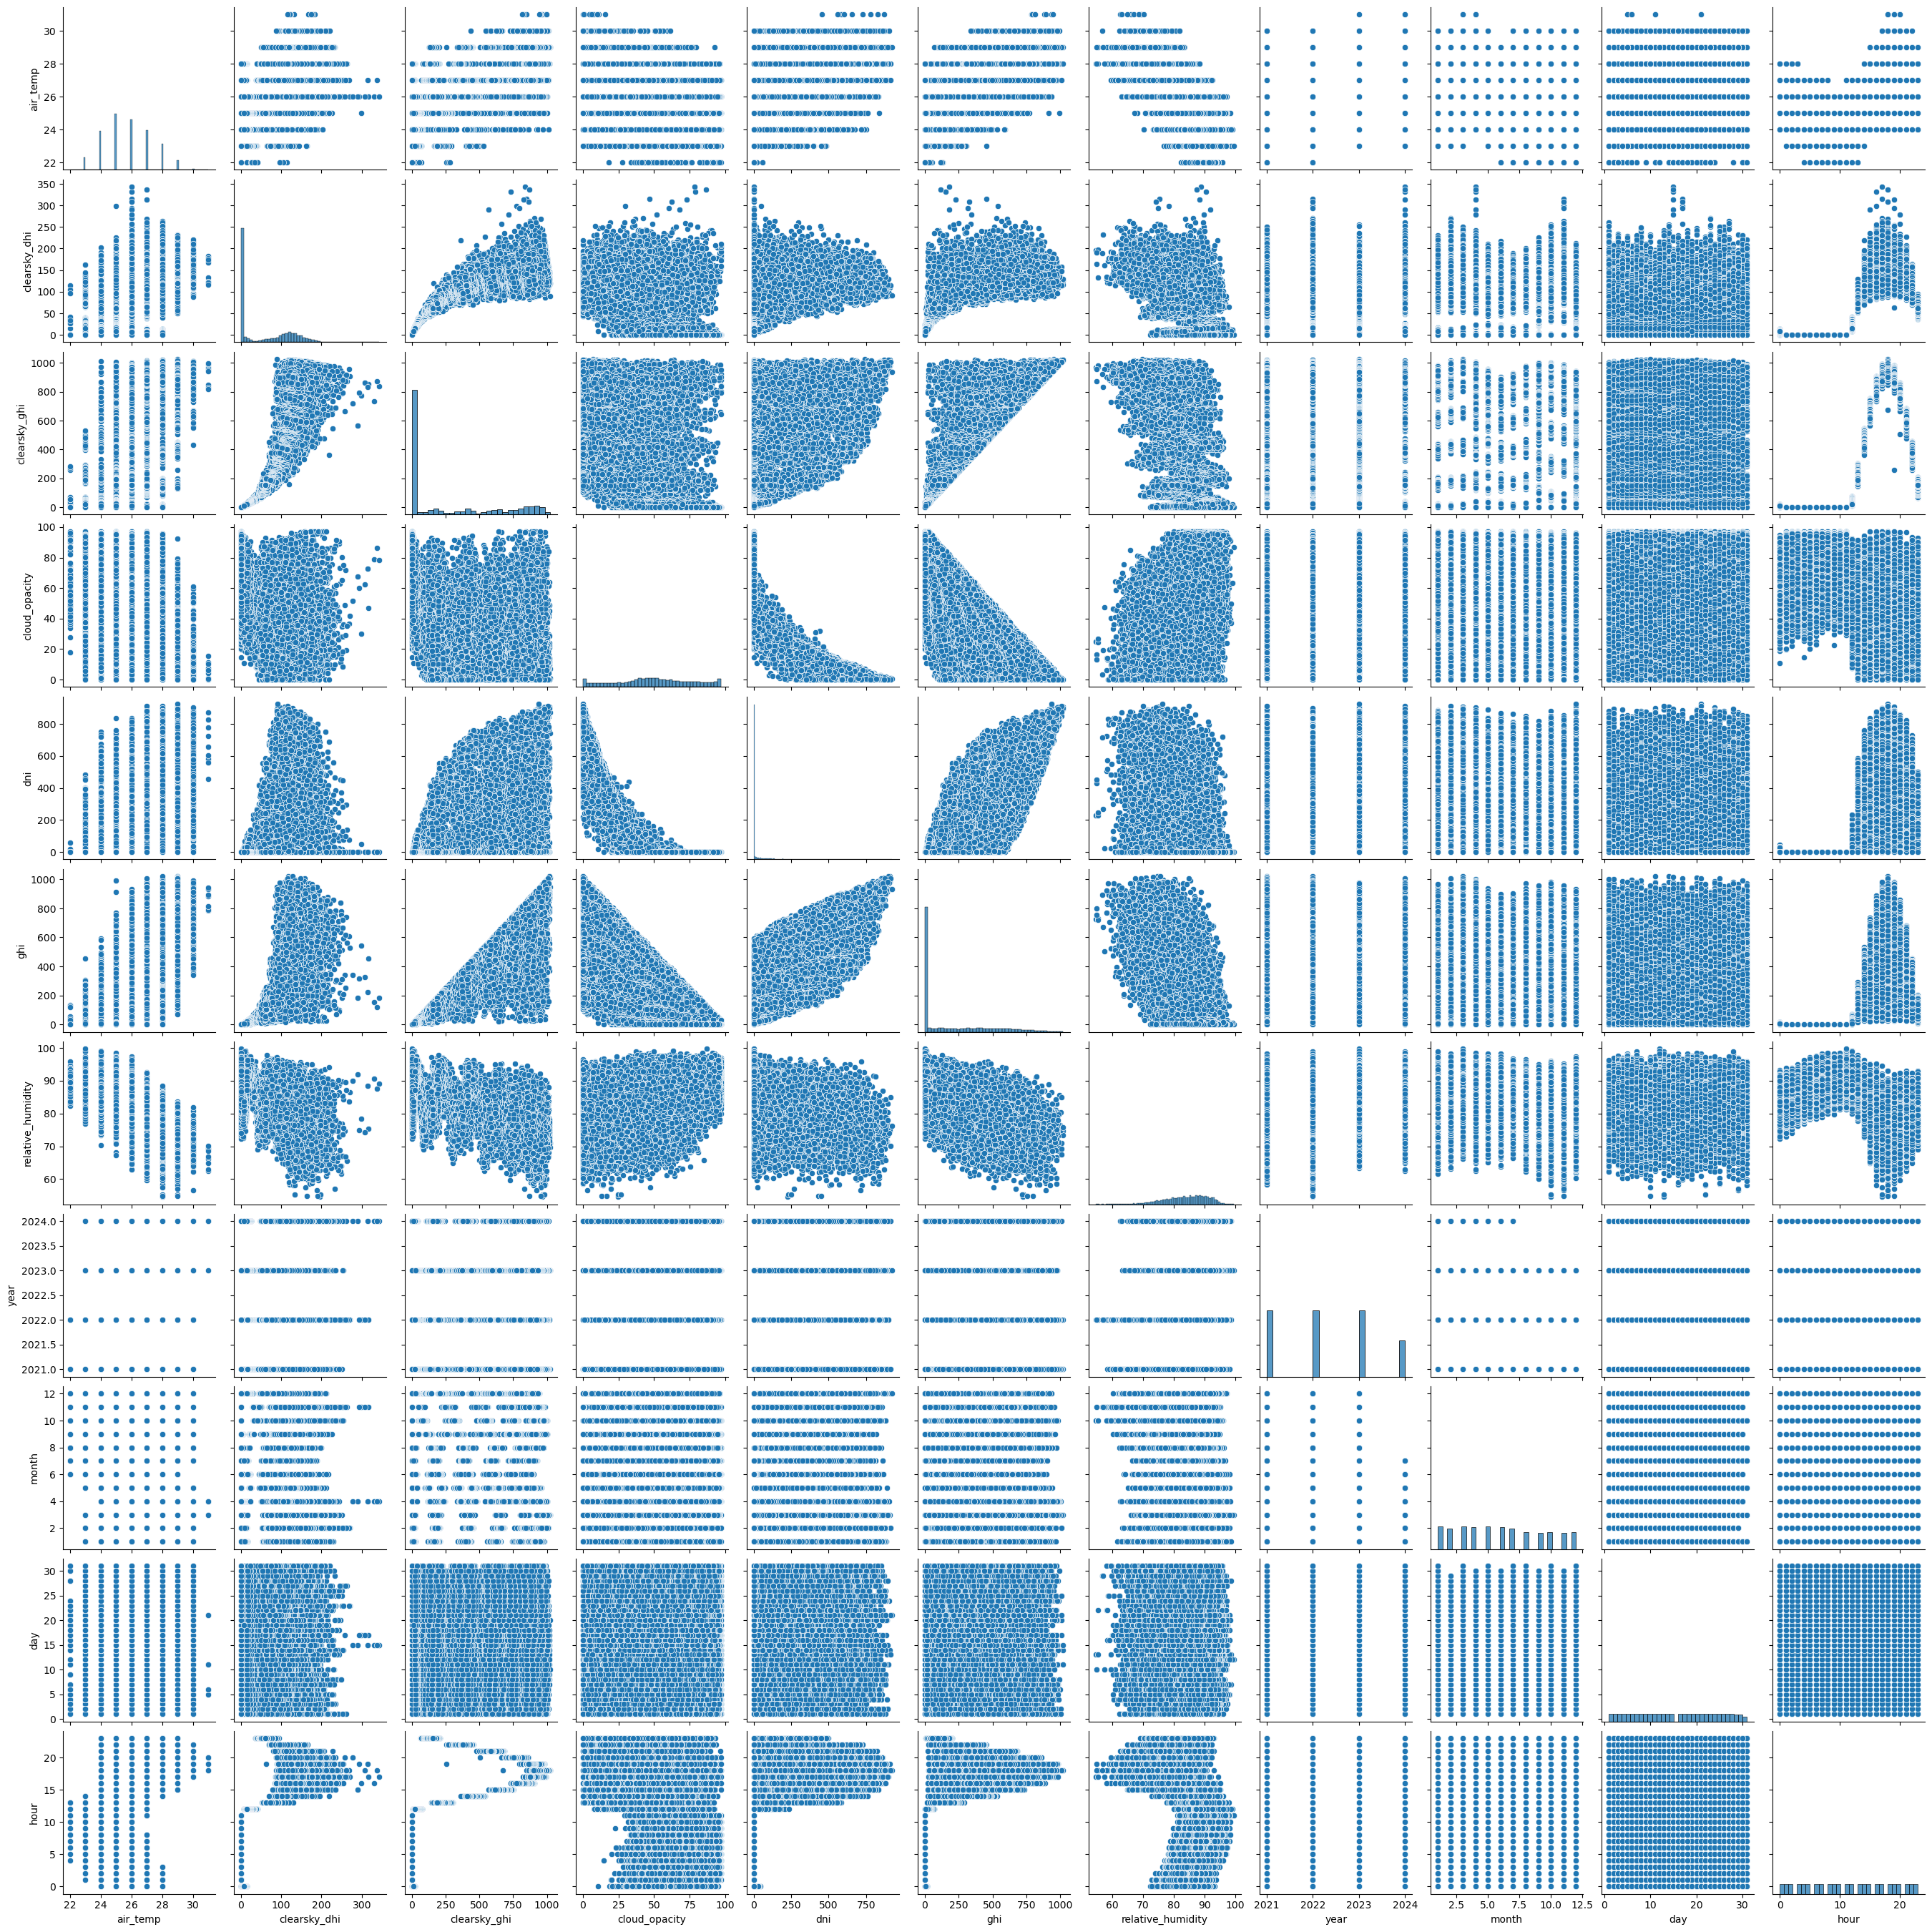

In [25]:
sns.pairplot(balao)